In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os, cv2
from sklearn.decomposition import PCA
import pandas as pd

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


In [33]:
# Paths to the dataset and CSV files
dir_name = "C:/Users/giree/Downloads/AI/dataset/faces/"
train_csv_path = "C:/Users/giree/Downloads/AI/train_lyst.csv"
test_csv_path = "C:/Users/giree/Downloads/AI/test_lyst.csv"

# Load the CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Initialize variables
y = []
X = []
target_names = []
person_id = 0
h = w = 300
n_samples = 0
class_names = []

# Load images and labels
for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path = os.path.join(dir_path, image_name)
        img = cv2.imread(image_path)
        if img is None:
            print(f"Warning: Image {image_path} could not be loaded.")
            continue
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        v = resized_image.flatten()
        X.append(v)
        n_samples += 1
        y.append(person_id)
    person_id += 1

y = np.array(y)
X = np.array(X)
target_names = np.array(class_names)
n_features = X.shape[1]
print(y.shape, X.shape, target_names.shape)
print("Number of samples:", n_samples)


(450,) (450, 90000) (9,)
Number of samples: 450


In [35]:
y = np.array(y)
X = np.array(X)
target_names = np.array(target_names)
n_features = X.shape[1]

print("Shapes of y, X, target_names:", y.shape, X.shape, target_names.shape)


Shapes of y, X, target_names: (450,) (450, 90000) (9,)


In [37]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 90000
n_classes: 9


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (337, 90000)
Test set size: (113, 90000)


Shape of PCA components: (150, 90000)
Expected number of features per component: 90000
Number of components: 150
Expected size: 13500000
Actual size: 13500000


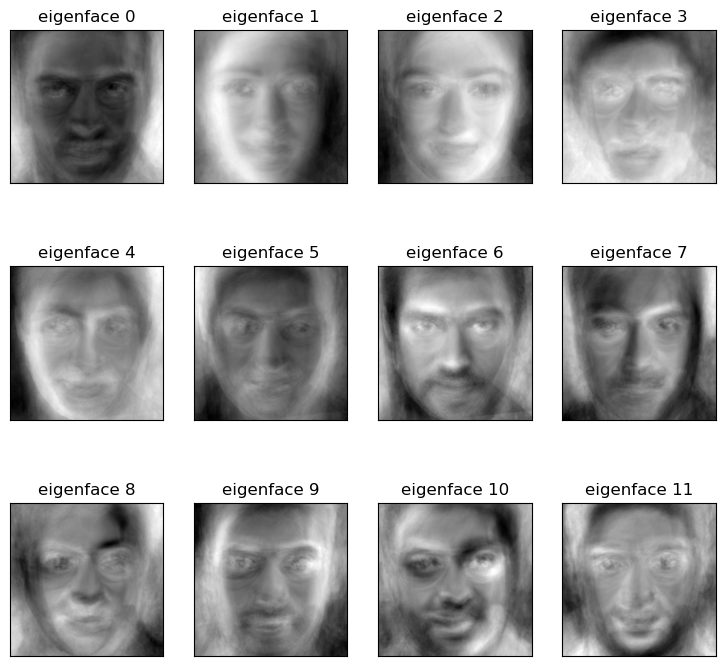

In [41]:
# Cell: Extract PCA Components and Reshape
n_components = 150
pca = PCA(n_components=n_components, whiten=True).fit(X)

# Print the shape of PCA components to diagnose the issue
print("Shape of PCA components:", pca.components_.shape)

# Correct dimensions based on actual features size
n_components = 150
h, w = 300, 300  # Updated dimensions to match 90000 features per component

# Calculate the number of features per component
n_features = h * w

# Print the expected number of features and components
print(f"Expected number of features per component: {n_features}")
print(f"Number of components: {n_components}")

# Check if the total size matches
expected_size = n_components * n_features
actual_size = pca.components_.shape[0] * pca.components_.shape[1]
print(f"Expected size: {expected_size}")
print(f"Actual size: {actual_size}")

# Ensure `pca.components_` can be reshaped
if actual_size == expected_size:
    eigenfaces = pca.components_.reshape((n_components, h, w))
    eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
    plot_gallery(eigenfaces, eigenface_titles, h, w)
    plt.show()
else:
    print("Error: The shape of pca.components_ does not match the expected dimensions. Please verify the dimensions.")


In [43]:
print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)


Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)


In [45]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)
X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("Project done...")


Project done...


In [47]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10, 10), max_iter=1000, verbose=True).fit(X_train_lda, y_train)
print("Model weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)


Iteration 1, loss = 2.77942947
Iteration 2, loss = 2.72338079
Iteration 3, loss = 2.67240991
Iteration 4, loss = 2.62039138
Iteration 5, loss = 2.56956837
Iteration 6, loss = 2.52400395
Iteration 7, loss = 2.47769062
Iteration 8, loss = 2.43356944
Iteration 9, loss = 2.39234944
Iteration 10, loss = 2.35243638
Iteration 11, loss = 2.31383036
Iteration 12, loss = 2.27774868
Iteration 13, loss = 2.24240857
Iteration 14, loss = 2.21061685
Iteration 15, loss = 2.17964375
Iteration 16, loss = 2.15107243
Iteration 17, loss = 2.12436278
Iteration 18, loss = 2.09741933
Iteration 19, loss = 2.07336860
Iteration 20, loss = 2.04809478
Iteration 21, loss = 2.02440682
Iteration 22, loss = 2.00119499
Iteration 23, loss = 1.97804696
Iteration 24, loss = 1.95594906
Iteration 25, loss = 1.93489442
Iteration 26, loss = 1.91374244
Iteration 27, loss = 1.89323816
Iteration 28, loss = 1.87235366
Iteration 29, loss = 1.85290850
Iteration 30, loss = 1.83272891
Iteration 31, loss = 1.81243614
Iteration 32, los

Accuracy: 62.83185840707964


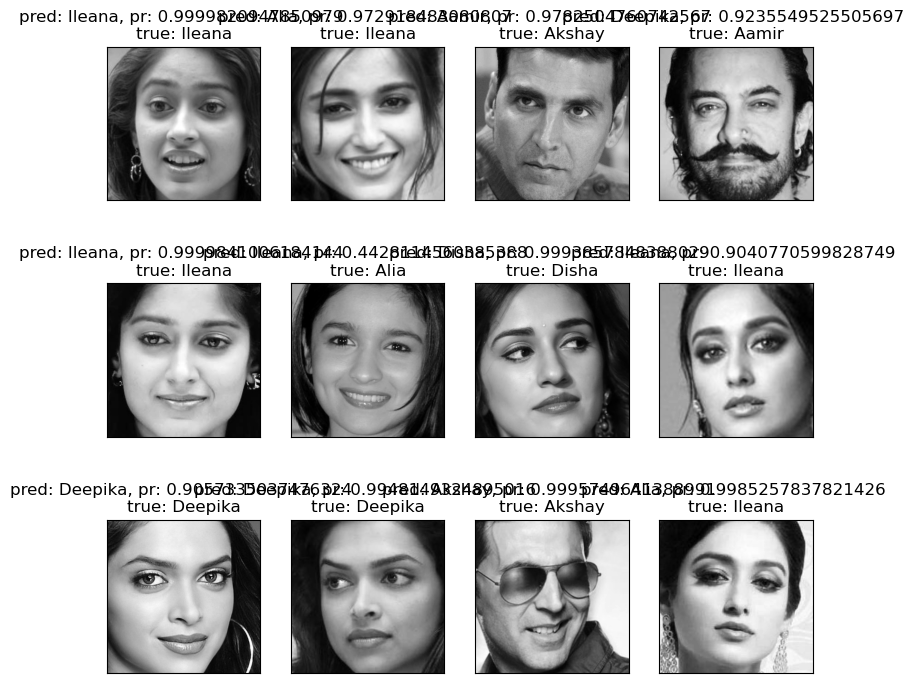

In [49]:
y_pred = []
y_prob = []

for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    class_id = np.where(prob == np.max(prob))[0][0]
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

y_pred = np.array(y_pred)
prediction_titles = []
true_positive = 0

for i in range(y_pred.shape[0]):
    true_name = target_names[y_test[i]]
    pred_name = target_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:], true_name)
    prediction_titles.append(result)
    if true_name == pred_name:
        true_positive += 1

print("Accuracy:", true_positive * 100 / y_pred.shape[0])

plot_gallery(X_test, prediction_titles, h, w)
plt.show()
